<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/simeseNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try: 
  %tensorflow_version 2.x
except Exception:
    pass 


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(10)]) - 1
    
    for d in range(10):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, 10)
            dn = (d + inc) % 10
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
            
    return np.array(pairs), np.array(labels)


def create_pairs_on_set(images, labels):
    
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')
    
    return pairs, y


def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(test_images.dtype)

uint8


In [6]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0


In [8]:
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

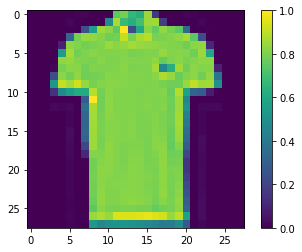

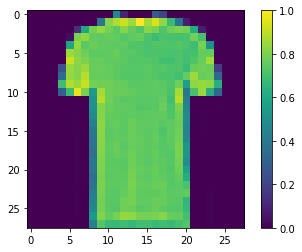

In [ ]:
pair_off = 10
show_image(ts_pairs[pair_off][0])
show_image(ts_pairs[pair_off][1])

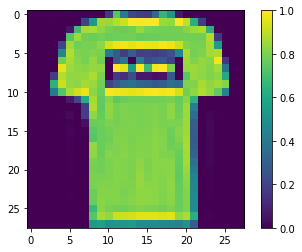

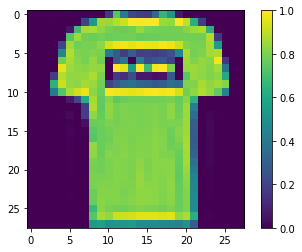

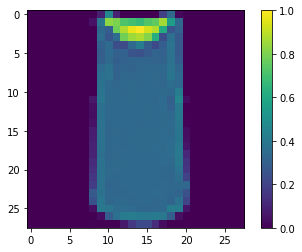

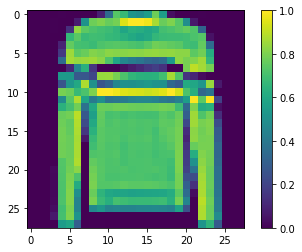

In [ ]:
show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])

In [33]:
from tensorflow.keras.layers import LayerNormalization
import tensorflow as tf
!pip install tensorflow==2.3.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 44 kB/s 
     |████████████████████████████████| 20.1 MB 62.6 MB/s 
     |████████████████████████████████| 459 kB 63.7 MB/s 
     |████████████████████████████████| 2.9 MB 47.8 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
 

In [34]:
def base_net():
  input = Input(shape=(28,28,),name='base_input')
  x = Flatten(name='flatten_input')(input)
  x = Dense(128,activation='relu', name ='first_base_dense')(x)
  x = Dropout(0.1,name='first_dropout')(x)
  x = Dense(128,activation='relu', name ='second_base_dense')(x)
  x = Dropout(0.1, name = 'second_dropout')(x)
  x = Dense(128,activation='relu', name='third_base_dense')(x)

  return Model(inputs = input, outputs = x)

In [35]:
def ecu_distance (vects):
  x,y = vects
  sum_square = K.sum(K.square(x - y),axis=1, keepdims=True)
  return K.sqrt(K.maximum(sum_square,K.epsilon()))

In [36]:
def eucl_dist_output_shape(shapess):
  shape1,shape2 = shapes
  return (shape1[0],1)
  

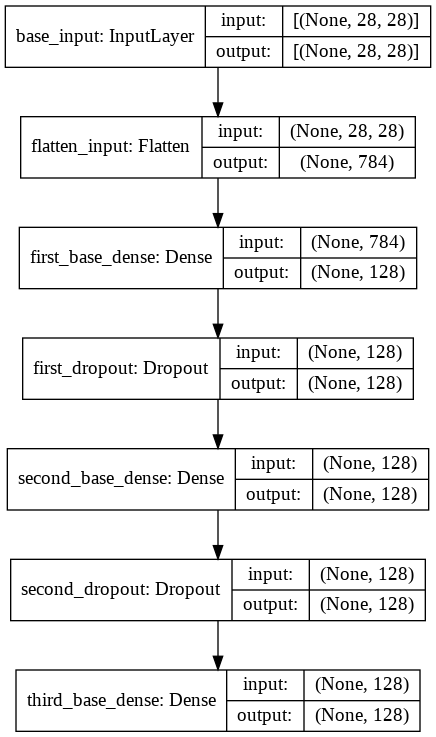

In [37]:
base_model = base_net()
plot_model(base_model,show_shapes=True,show_layer_names=True, to_file='b.png')

In [38]:
base_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_input (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 first_base_dense (Dense)    (None, 128)               100480    
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_base_dense (Dense)   (None, 128)               16512     
                                                                 
 second_dropout (Dropout)    (None, 128)               0         
                                                                 
 third_base_dense (Dense)    (None, 128)               1651

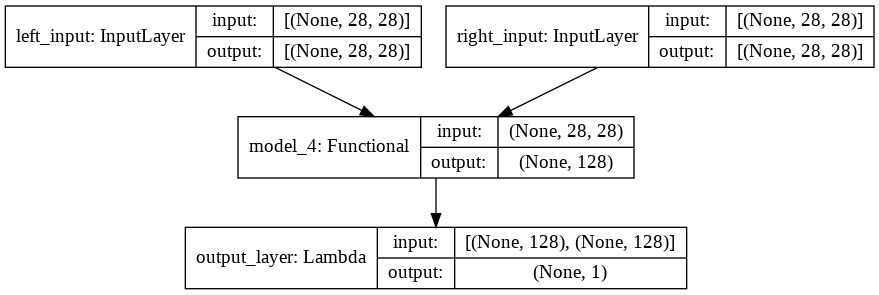

In [39]:
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [40]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss


In [42]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))


Epoch 1/20
938/938 [==============================] - 11s 11ms/step - loss: 0.1115 - val_loss: 0.0884
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0802 - val_loss: 0.0770
Epoch 3/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0720 - val_loss: 0.0726
Epoch 4/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0672 - val_loss: 0.0675
Epoch 5/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0644 - val_loss: 0.0660
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0619 - val_loss: 0.0671
Epoch 7/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0603 - val_loss: 0.0708
Epoch 8/20
938/938 [==============================] - 10s 10ms/step - loss: 0.0590 - val_loss: 0.0699
Epoch 9/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0579 - val_loss: 0.0641
Epoch 10/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0563 - val_los

In [43]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [44]:
loss = model.evaluate(x=[ts_pairs[:,0],ts_pairs[:,1]], y=ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))

625/625 [==============================] - 1s 2ms/step - loss: 0.0659
Loss = 0.06590814143419266, Train Accuracy = 0.9341973662277047 Test Accuracy = 0.9111111111111111


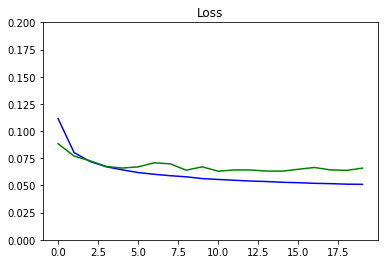

In [45]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [46]:
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)

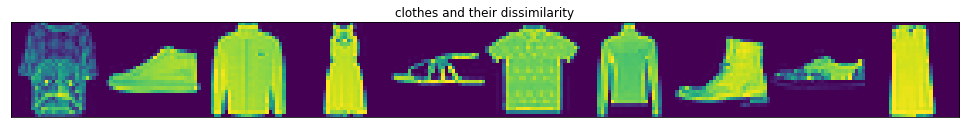

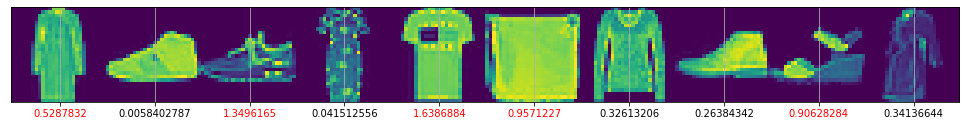

In [47]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(tr_pairs[:, 0][indexes], tr_pairs[:, 1][indexes], y_pred_train[indexes], tr_y[indexes], "clothes and their dissimilarity", 10)